# Tarefa do Dataset do Grupo

O dataset escolhido pelo grupo foi "Life Expectancy" que se encontra https://www.kaggle.com/datasets/augustus0498/life-expectancy-who?select=led.csv.

Com este dataset, pretendemos definir um modelo que nos permita prever a esperança média de vida, dadas as caracteristicas populacionais, e identificar os valores que mais a influenciam.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
%matplotlib inline

## **Import Dataset & First Analysis**

In [3]:
df = pd.read_csv("dataset/led.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Country                       2938 non-null   object 
 1   Year                          2938 non-null   int64  
 2   Status                        2938 non-null   object 
 3   Lifeexpectancy                2928 non-null   float64
 4   AdultMortality                2928 non-null   float64
 5   infantdeaths                  2938 non-null   int64  
 6   Alcohol                       2744 non-null   float64
 7   percentageexpenditure         2938 non-null   float64
 8   HepatitisB                    2385 non-null   float64
 9   Measles                       2938 non-null   int64  
 10  BMI                           2904 non-null   float64
 11  under-fivedeaths              2938 non-null   int64  
 12  Polio                         2919 non-null   float64
 13  Tot

In [4]:
df.describe()

,Year,Lifeexpectancy,AdultMortality,infantdeaths,Alcohol,percentageexpenditure,HepatitisB,Measles,BMI,under-fivedeaths,Polio,Totalexpenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness1-19years,thinness5-9years,Incomecompositionofresources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


### *Análise de valores, colunas, etc*

**Status:** Developed and Developing

**Lifeexpectancy:** Live Expectancy in years

**AdultMortality:** Adult Mortality Rates (probability of dying between 15 and 60 years per 1000 population)

**infantdeaths:** Number of Infant Deaths per 1000 population

**Alcohol:** Alcohol, recorded per capita (15+) consumption (in litres of pure alcohol)

**percentageexpenditure:** Expenditure on health as a percentage of Gross Domestic Product per capita(%) 

**HepatitisB:** Hepatitis B (HepB) immunization coverage among 1-year-olds (%)

**Measles:** Measles - number of reported cases per 1000 population

**BMI:** Average Body Mass Index of entire population

**under-fivedeaths:** Number of under-five deaths per 1000 population

**Polio:** Polio (Pol3) immunization coverage among 1-year-olds (%)

**Totalexpenditure:** General government expenditure on health as a percentage of total government expenditure (%)

**Diphtheria:** Diphtheria tetanus toxoid and pertussis (DTP3) immunization coverage among 1-year-olds (%)

**HIV/AIDS:** Deaths per 1 000 live births HIV/AIDS (0-4 years)

**GDP:** Gross Domestic Product per capita (in USD)

**Population:** Population of the country

**thinness1-19years:** Prevalence of thinness among children and adolescents for Age 10 to 19 (% )

**thinness5-9years:** Prevalence of thinness among children for Age 5 to 9(%)

**Incomecompositionofresources:** Human Development Index in terms of income composition of resources (index ranging from 0 to 1)

**Schooling:** Number of years of Schooling(years)

<AxesSubplot:xlabel='Schooling', ylabel='Count'>

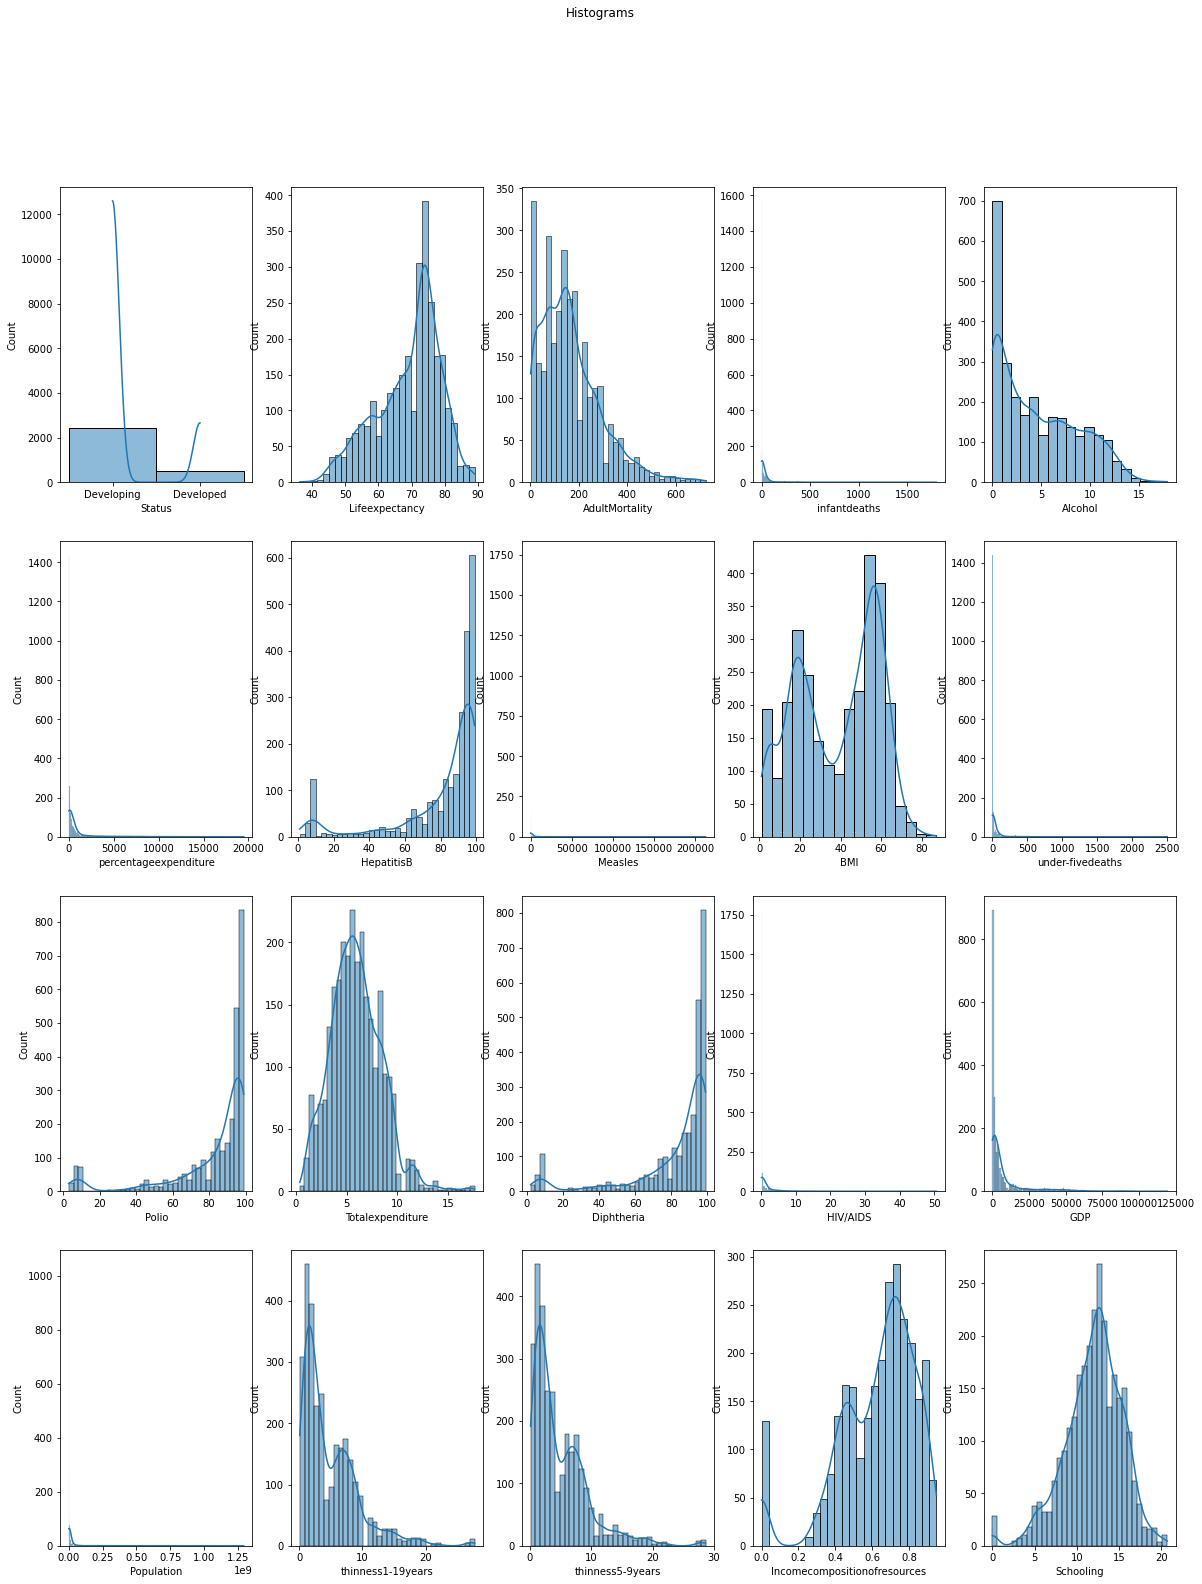

In [7]:
fig, axs = plt.subplots(4,5,figsize=(20,25))
fig.suptitle('Histograms')

sns.histplot(df['Status'], ax=axs[0,0], kde=True)
sns.histplot(df['Lifeexpectancy'], ax=axs[0,1], kde=True)
sns.histplot(df['AdultMortality'], ax=axs[0,2], kde=True)
sns.histplot(df['infantdeaths'], ax=axs[0,3], kde=True)
sns.histplot(df['Alcohol'], ax=axs[0,4], kde=True)

sns.histplot(df['percentageexpenditure'], ax=axs[1,0], kde=True)
sns.histplot(df['HepatitisB'], ax=axs[1,1], kde=True)
sns.histplot(df['Measles'], ax=axs[1,2], kde=True)
sns.histplot(df['BMI'], ax=axs[1,3], kde=True)
sns.histplot(df['under-fivedeaths'], ax=axs[1,4], kde=True)

sns.histplot(df['Polio'], ax=axs[2,0], kde=True)
sns.histplot(df['Totalexpenditure'], ax=axs[2,1], kde=True)
sns.histplot(df['Diphtheria'], ax=axs[2,2], kde=True)
sns.histplot(df['HIV/AIDS'], ax=axs[2,3], kde=True)
sns.histplot(df['GDP'], ax=axs[2,4], kde=True)

sns.histplot(df['Population'], ax=axs[3,0], kde=True)
sns.histplot(df['thinness1-19years'], ax=axs[3,1], kde=True)
sns.histplot(df['thinness5-9years'], ax=axs[3,2], kde=True)
sns.histplot(df['Incomecompositionofresources'], ax=axs[3,3], kde=True)
sns.histplot(df['Schooling'], ax=axs[3,4], kde=True)

### *Duplicated Values*

In [29]:
#There are no duplicated lines
print(df.duplicated().sum())

0


### *Missing values:*

In [30]:
df.isnull().sum()

Country                           0
Year                              0
Status                            0
Lifeexpectancy                   10
AdultMortality                   10
infantdeaths                      0
Alcohol                         194
percentageexpenditure             0
HepatitisB                      553
Measles                           0
BMI                              34
under-fivedeaths                  0
Polio                            19
Totalexpenditure                226
Diphtheria                       19
HIV/AIDS                          0
GDP                             448
Population                      652
thinness1-19years                34
thinness5-9years                 34
Incomecompositionofresources    167
Schooling                       163
dtype: int64

<AxesSubplot:>

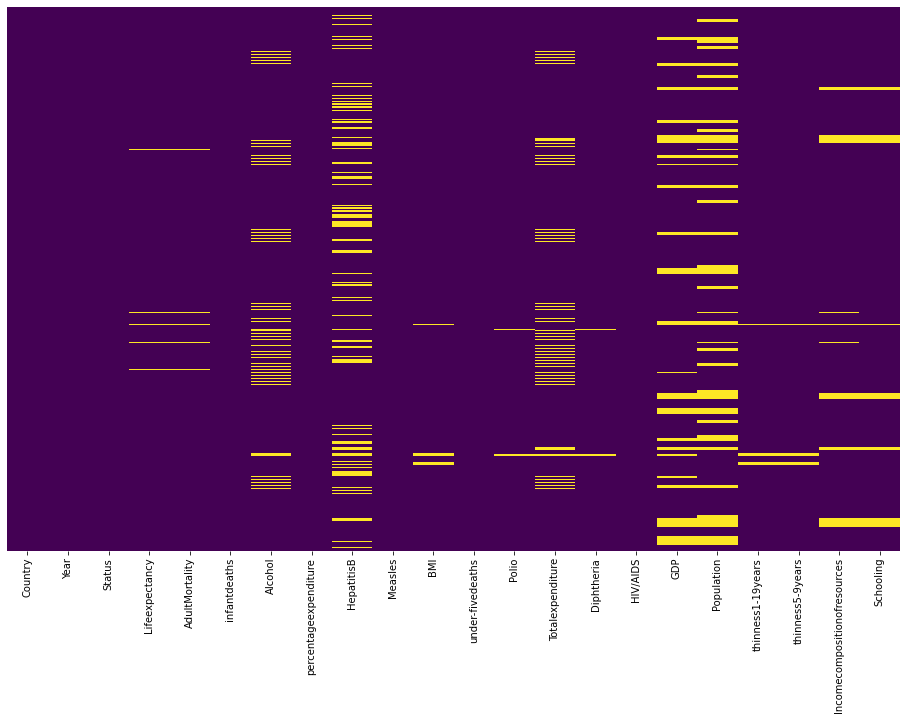

In [31]:
plt.figure(figsize = (16,10))
sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')

### *Correlation*


<AxesSubplot:>

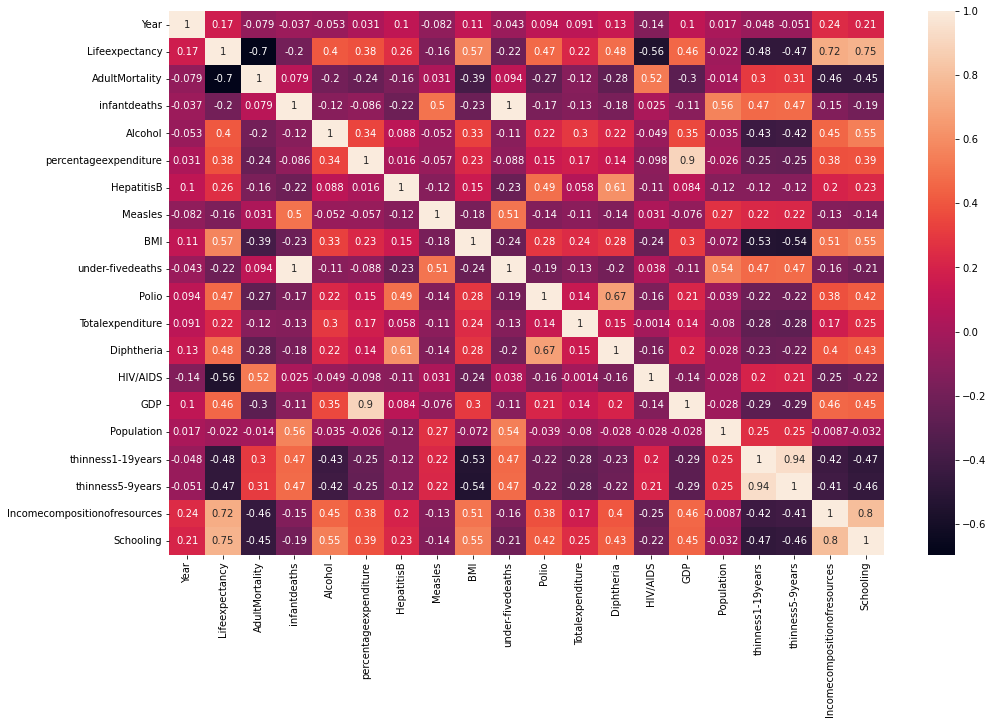

In [32]:
plt.figure(figsize = (16,10))
sns.heatmap(df.corr(), annot=True)

### *Outliers*

In [ ]:
#plt.figure(figsize=(30,20))
#df_aux = df.drop(['Population'], axis=1)
#df_aux.boxplot()
#df_aux.boxplot()

## **Preprocessing**

### *Handling Missing Values*

1) Drop Line

In [34]:
def drop_missing_values(df):
    df = df.dropna()
    return df

2) Replace with Mean

In [35]:
def replace_mean_missing_values(df):
    df = df.fillna(df.mean())
    return df

3) Group Mean
Lifeexpectancy                   10\
AdultMortality                   10\
Alcohol                         194\
HepatitisB => Mean per Country (ou drop)\
BMI                              34\
Polio                            19\
Totalexpenditure => Mean per Country (ou drop)\
Diphtheria                       19\
GDP => Mean per Country (ou drop)\
Population => Mean by Country (ou drop)\
thinness1-19years                34\
thinness5-9years                 34\
Incomecompositionofresources    167\
Schooling  => Mean by Country\

In [36]:
def replace_mean_country(df):        
    df_final = df.copy()
    col = ['Alcohol','Schooling', 'Incomecompositionofresources', 'thinness5-9years', 'thinness1-19years', 'Population', 'GDP', 'Diphtheria', 'Totalexpenditure',
          'Polio', 'BMI', 'HepatitisB','AdultMortality', 'Lifeexpectancy']
    
    for x in col:
        vals = df.groupby('Country')[x].mean()     #Gets the mean of the values of each country for each column with missing values
        for y,z in zip(vals.index, vals):          #For each Country, gets the value calculated with the mean
            df_aux = df.loc[df['Country'] == y, x] #Gets the values of the column x with missing values of the country y
            df_aux = df_aux.fillna(z)              #Replace the missing values with the mean
            df.loc[df['Country'] == y, x] = df_aux
    return df
#print("Nb Rows: ",len(df.index))
#print(df.isnull().sum())          
#print("Nb Rows: ",len(df.index))
#print(df.isnull().sum())

### *Handling categorical data*

In [37]:
from sklearn.preprocessing import OneHotEncoder

In [38]:
#Label encoding:
label_encoding = False
def replace_map(df, column_name):
    labels = df[column_name].astype('category').cat.categories.tolist()
    replace_map = {column_name : {k: v for k,v in zip(labels, list(range(1,len(labels)+1)))}}
    
    return replace_map

#One Hot Encoding:
one_hot_encoding = True

1) Drop Country:

In [39]:
def drop_country(df):
    df_country_drop = df.drop(['Country'], axis=1)
    return df_country_drop

2) Drop Status

In [40]:
def drop_status(df):
    df_status_drop = df.drop(['Status'], axis=1)
    return df_status_drop

In [ ]:
def drop_thiness119years(df):
    df_drop= df.drop(['thinness1-19years'])
    return df_drop

In [ ]:
def drop_thiness59years(df):
    df_drop= df.drop(['thinness5-9years'])
    return df_drop

In [ ]:

def drop_GDP(df):
     df_drop= df.drop(['GDP'])
     return df_drop

In [ ]:
def drop_percentageexpenditure(df):
    df_drop= df.drop(['percentageexpenditure'])
    return df_drop

In [ ]:
def drop_under5deaths(df):
    df_drop= df.drop(['under-fivedeaths'])
    return df_drop

In [ ]:
def drop_infantsdeaths(df):
    df_drop= df.drop(['infantdeaths'])
    return df_drop

In [ ]:
def drop_Incomecompositionofresources(df):
    df_drop= df.drop(['Incomecompositionofresources'])
    return df_drop

In [ ]:
def drop_schooling(df):
    df_drop= df.drop(['Schooling'])
    return df_drop

3) Encoding Country

In [41]:
def encoding_country(df):
    df_encoding_country = df.copy()
    if(label_encoding):
        replace_map_country = replace_map(df_encoding_country, 'Country')    
        df_encoding_country.replace(replace_map_country, inplace=True)
        df_encoding_country.head()
    if(one_hot_encoding):
        ohe = OneHotEncoder()
        transformed_country = ohe.fit_transform(df_encoding_country[['Country']])
        df_encoding_country[ohe.categories_[0]] = transformed_country.toarray()
        df_encoding_country = df_encoding_country.drop(['Country'], axis=1)
    return df_encoding_country

4) Encoding Status

In [42]:
def encoding_status(df):
    df_encoding_status = df.copy()
    if(label_encoding):
        replace_map_status = replace_map(df_encoding_status, 'Status')
        df_encoding_status.replace(replace_map_status, inplace=True)
        df_encoding_status.head()
    if(one_hot_encoding):
        ohe = OneHotEncoder()
        transformed_status = ohe.fit_transform(df_encoding_status[['Status']])
        df_encoding_status[ohe.categories_[0]] = transformed_status.toarray()
        df_encoding_status = df_encoding_status.drop(['Status'], axis=1)
    
    return df_encoding_status

### *Feature Selection*

In [43]:
def feature_selection(df):
    #Column Country is drop: It is not really relevant for what we are trying to predict, and it doesn't really has correlation to other values
    df.drop(['Country'], axis=1, inplace=True)    
    #Column Year is drop: Similar to the previous one:
    df.drop(['Year'], axis=1, inplace=True)
        
    #Column Population: this column has a lot of missing values, and as we can see, it has a low correlation
    df.drop(['Population'], axis=1, inplace=True)

### *Data Normalization*

1) min-max feature scaling

In [44]:
from sklearn.preprocessing import MinMaxScaler

In [45]:
def minMaxScaler(df):
    df_scaled = df.copy()
    scaler = MinMaxScaler()
    df_scaled_cols = df.columns
    df_scaled = pd.DataFrame(scaler.fit_transform(df_scaled), columns=df_scaled_cols)
    return df_scaled#, scaler


    #X_copy = X.copy() #We create a copy so we can still refer to the original dataframe later
    #scaler = MinMaxScaler()
    #X_columns = X.columns
    #X_scaled = pd.DataFrame(scaler.fit_transform(X_copy), columns=X_columns)
    #X_scaled.head()
    


### Handling Outliers

In [1]:
def handling_outliers(df):
    from scipy import stats
    import numpy as np
    
    for x in df.columns:
        z = np.abs(stats.zscore(df[x]))
        if y1 in z:
            if(y1 > 3):
                
        y = np.where(z>3)
        print(type(y))
        for y1 in y:
            
            df.drop(y1,axis=0,inplace = True)

IndentationError: expected an indented block (2765705152.py, line 10)

## **Regression Models**

In [46]:
from sklearn.model_selection import train_test_split, GridSearchCV, RepeatedKFold
from sklearn.linear_model import LinearRegression, Ridge, SGDRegressor, Lasso
from sklearn.metrics import mean_squared_error, mean_absolute_error, plot_confusion_matrix,ConfusionMatrixDisplay, r2_score
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

/tmp/ipykernel_11420/3040171951.py:2: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df = df.fillna(df.mean())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Status                        2938 non-null   object 
 1   Lifeexpectancy                2938 non-null   float64
 2   AdultMortality                2938 non-null   float64
 3   infantdeaths                  2938 non-null   int64  
 4   Alcohol                       2938 non-null   float64
 5   percentageexpenditure         2938 non-null   float64
 6   HepatitisB                    2938 non-null   float64
 7   Measles                       2938 non-null   int64  
 8   BMI                           2938 non-null   float64
 9   under-fivedeaths              2938 non-null   int64  
 10  Polio                         2938 non-null   float64
 11  Totalexpenditure              2938 non-null   float64
 12  Diphtheria                    2938 non-null   float64
 13  HIV

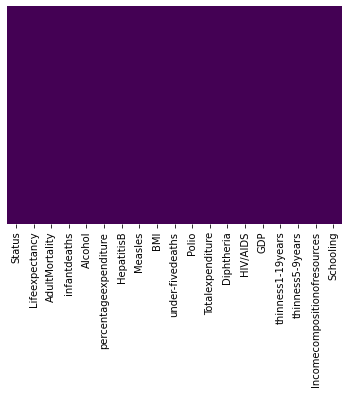

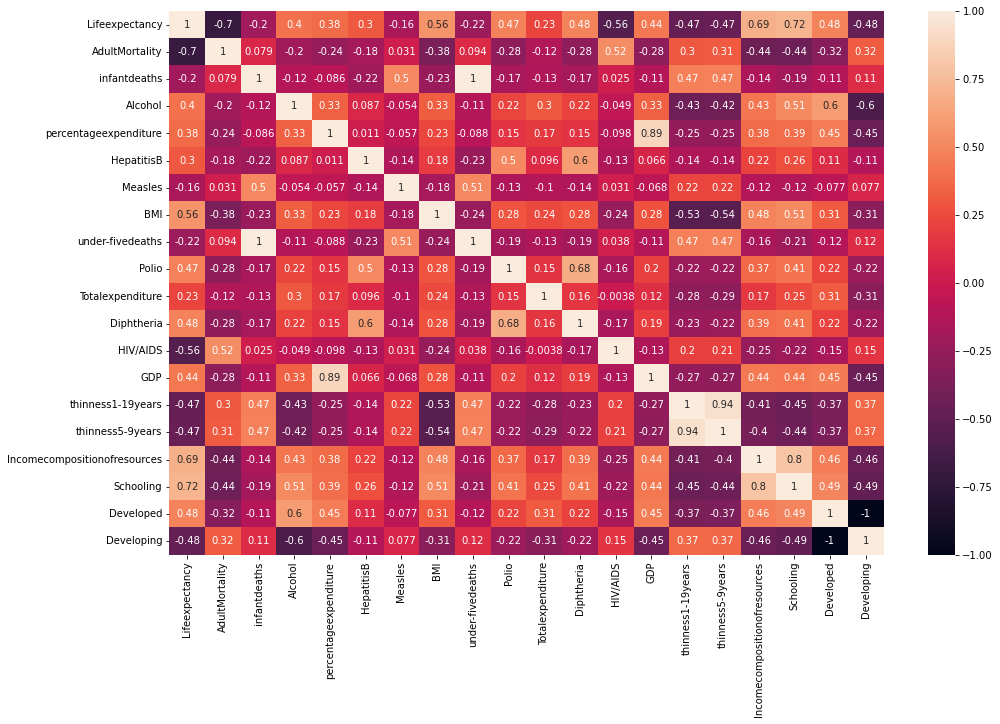

In [47]:
replace_mean_country(df)
#df = df.dropna() ##Se ainda houver valores nan
#df = replace_mean_missing_values(df)
feature_selection(df)
df = replace_mean_missing_values(df) #df.dropna() ##Se ainda houver valores nan

sns.heatmap(df.isnull(),yticklabels=False, cbar=False, cmap='viridis')
df.info()

#Call function to handle categorical data:
df_new = encoding_status(df)

plt.figure(figsize = (16,10))
sns.heatmap(df_new.corr(), annot=True)



X = df_new.drop(['Lifeexpectancy'], axis=1)
y = df_new['Lifeexpectancy']
scaled_X = minMaxScaler(X)

gridsearch = False
linear = False
svr = False
ridge = False
sgd = False
rdr = True
lasso = False

### *Regression Algorithm & Fit Model*

In [48]:
if(not(gridsearch)):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state=2022)
    
    
    
    if(linear):
        lm = LinearRegression()
        lm.fit(X_train, y_train)
        
    elif(svr):
        print("SVR")
        
    elif(ridge):
        # apply model with CV
        lm = Ridge()
        lm.fit(X_train, y_train)
        
    elif(sgd):
        print("SGD")
        sgdr = SGDRegressor()
        sgdr.fit(X_train, y_train)
        
    elif(rdr):
        rdr = RandomForestRegressor()
        rdr.fit(X_train, y_train)
        
    elif(lasso):
        l = Lasso()
        l.fit(X_train, y_train)

## **Model Evaluation**

mean square error: 16.177179898713497
mean absolute error: 3.007235862872897
root mean square error: 4.022086510595402


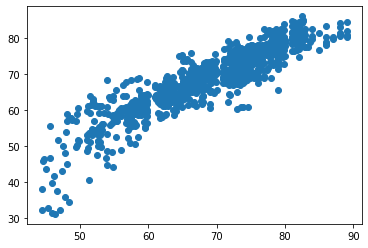

In [49]:
if(not(gridsearch)):
    if(linear):
        y_pred = lm.predict(X_test)

        plt.scatter(y_test,y_pred)
        plt.x = "Y Expected"
        plt.y = "Y Predicted"
    
        print("R2 Score: %.3f" % r2_score(y_test, y_pred))
        print("mean square error: "+ str(mean_squared_error(y_test, y_pred)))
        print("mean absolute error: "+ str(mean_absolute_error(y_test, y_pred)))
        print("root mean square error: "+ str(mean_squared_error(y_test, y_pred, squared= False)))
        
    elif(ridge):
        # apply model with CV
        y_pred = lm.predict(X_test)

        plt.scatter(y_test,y_pred)
        plt.x = "Y Expected"
        plt.y = "Y Predicted"
        
        print("R2 Score: %.3f" % r2_score(y_test, y_pred))
        print("mean square error: "+ str(mean_squared_error(y_test, y_pred)))
        print("mean absolute error: "+ str(mean_absolute_error(y_test, y_pred)))
        print("root mean square error: "+ str(mean_squared_error(y_test, y_pred, squared= False)))
        
    elif(sgd):
        y_pred = sgdr.predict(X_test)

        plt.scatter(y_test,y_pred)
        plt.x = "Y Expected"
        plt.y = "Y Predicted"
    
        print("R2 Score: %.3f" % r2_score(y_test, y_pred))
        print("mean square error: "+ str(mean_squared_error(y_test, y_pred)))
        print("mean absolute error: "+ str(mean_absolute_error(y_test, y_pred)))
        print("root mean square error: "+ str(mean_squared_error(y_test, y_pred, squared= False)))
        
    elif(rdr):
        y_pred = rdr.predict(X_test)

        plt.scatter(y_test,y_pred)
        plt.x = "Y Expected"
        plt.y = "Y Predicted"
    
        
        print("R2 Score: %.3f" % r2_score(y_test, y_pred))
        print("mean square error: "+ str(mean_squared_error(y_test, y_pred)))
        print("mean absolute error: "+ str(mean_absolute_error(y_test, y_pred)))
        print("root mean square error: "+ str(mean_squared_error(y_test, y_pred, squared= False)))
    
    elif(lasso):
        y_pred = l.predict(X_test)

        plt.scatter(y_test,y_pred)
        plt.x = "Y Expected"
        plt.y = "Y Predicted"
    
        print("R2 Score: %.3f" % r2_score(y_test, y_pred))
        print("mean square error: "+ str(mean_squared_error(y_test, y_pred)))
        print("mean absolute error: "+ str(mean_absolute_error(y_test, y_pred)))
        print("root mean square error: "+ str(mean_squared_error(y_test, y_pred, squared= False)))

* Linear: 
    * Drop Both, Drop NA:                      MSE = 12,96 RMSE = 3,6
    * Drop Country, Drop NA:                   MSE = 12,87 RMSE = 3,59
    * Drop Country, Year, OHE Status, Drop NA: MSE = 13.27 RMSE= 3,64
    * Drop Country, Year, OHE Status, Replace by Country & Drop NA: MSE = 16.07 RMSE= 4.01
    * Drop Country, Year, OHE Status, Replace NA: MSE = 16.45 RMSE= 4.06
    * Drop Country, Year, Population, OHE Status, Replace by Country & Drop NA: MSE = 15.78 RMSE = 3.97

## **GridSearch**

In [50]:
if(gridsearch):
    
    if(ridge):
        lm = Ridge()
        #'normalize': [True, False], 'fit_intercept': [True, False],
        parameters = {'solver': ['svd', 'cholesky', 'lsqr', 'sag'],'alpha': [0.5, 0.3, 0.7], 'max_iter': [20000, 17000, 23000]}
    
    scoring = ['neg_mean_squared_error','f1']
    
    cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

    grid = GridSearchCV(lm,parameters,scoring='neg_mean_squared_error',n_jobs=-1, cv=cv)

    result = grid.fit(X,y)

    print(" ************************************************************************************************ " )
    print(" Results from Grid Search " )
    print("\n The best estimator across ALL searched params:\n",result.best_estimator_)
    print("\n The best score across ALL searched params:\n",result.best_score_)
    print("\n The best parameters across ALL searched params:\n",result.best_params_)
    print(" ************************************************************************************************ " )
